<a href="https://colab.research.google.com/github/BhanuPShahi/-Taxi-Mobility-Surge-Price-Prediction/blob/main/Bhanu_P_Shahi_10_05_2021_%5BTeam_2%5D_Capstone_Project_2_Taxi_Mobility_Surge_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taxi Mobility Surge Price Prediction**

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers.
The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.
* Trip_ID: ID for TRIP
* Trip_Distance: The distance for the trip requested by the customer
* TypeofCab: Category of the cab requested by the customer
* CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month
* LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour
* ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above
* Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.
* Customer_Rating: Average of lifetime ratings of the customer till date
CancellationLast1Month: Number of trips cancelled by the customer in last 1 month
* Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes
* Gender: Gender of the customer
* SurgePricingType: Target (can be of 3 types) - DV


#**Introduction**
###The cab platforms adjust their prices using a specific algorithm which is real time and dynamic known as **“Surge Pricing”** or **“Dynamic Pricing”**. This algorithm automatically raises the price of a trip when the demand increases more than the supply. The surge algorithm generally outputs a multiplier which is adjusted along with the base fare, the price per mile and the price per minute to generate the final price. This price is communicated to the riders and the ride is initiated when they confirm to the price shown. This surge multiplier is kept discrete and may range from 1.2 to the maximum allowed by the government based on geography. 

###Our goal here is to build a predictive model, which could help them in predicting the surge pricing type proactively.

##**Types of Pricing**
* Static Pricing
* Dynamic Pricing(Surge Pricing)

###The distance and travel time based taxi pricing scheme (Static Pricing) has been prevalent for decades. One major drawback of the current taxi price is that it fails to take the time of day into consideration while the demand in the market is time sensitive. So there is a need of Dynamic pricing.

##**Reasons for surge pricing**
The reasons for surge pricing are:
* normal peak-hours
* bad weather conditions (rain, snow, etc)
* events (concerts, movie-premiere)
* traffic conditions
* unseen emergencies and so on.

#**How Surge pricing works**

##Demand for rides increases
There are times when so many people are requesting rides that there aren’t enough cars on the road to help take them all. Bad weather, rush hour, and special events, for instance, may cause unusually large numbers of people to want to request a ride with Uber all at the same time.

##Prices go up
In these cases of very high demand, prices may increase to help ensure that those who need a ride can get one. This system is called surge pricing, and it lets the Uber app continue to be a reliable choice.

##Riders pay more or wait
Whenever rates are raised due to surge pricing, the Uber app lets riders know. Some riders will choose to pay, while some will choose to wait a few minutes to see if the rates go back down.

##So far we have seen and build the concepts around Surge pricing. Now let's start some practical implementation with the data.

#Importing Libraries

In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 102kB 3.7MB/s 


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

#Loading the data set

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Projects/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv'
df=pd.read_csv(path)

#**Exploratory Data Analysis**

###Let's start with doing some exploratory data analysis.

In [ ]:
#shape of data
df.shape

(131662, 14)

* Dataset have 131662 records and 14 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [90]:
df.head(2)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.905,0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.450,0,56,78,Male,2


In [ ]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

##We start with the analysis of our dependent variable **Surge_Pricing_Type**

In [ ]:
df.Surge_Pricing_Type.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

* **Here we can see that it's a Multiclass classification problem having imbalanced target variables.**

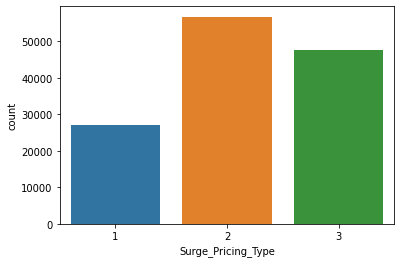

In [ ]:
sns.countplot(df['Surge_Pricing_Type'])

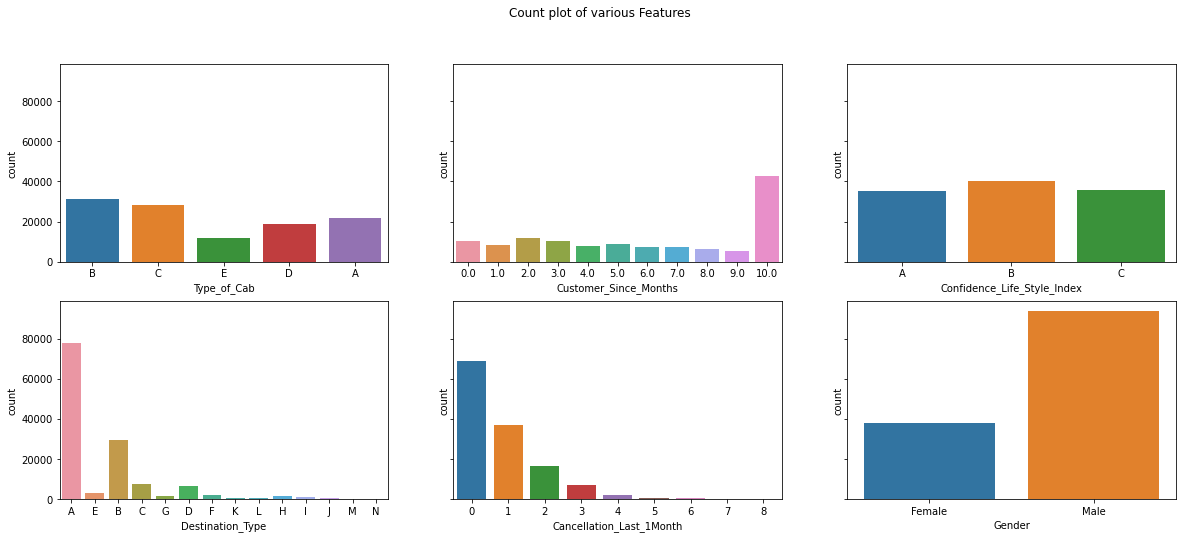

In [ ]:
#let's plot countplots of some features
fig,axes=plt.subplots(2,3, figsize=(20,8),sharey=True)
fig.suptitle('Count plot of various Features')
#1
sns.countplot(ax=axes[0,0],x=df['Type_of_Cab'])
#2
sns.countplot(ax=axes[0,1],x=df['Customer_Since_Months'])
#3
sns.countplot(ax=axes[0,2],x=df['Confidence_Life_Style_Index'])
#4
sns.countplot(ax=axes[1,0],x=df['Destination_Type'])
#5
sns.countplot(ax=axes[1,1],x=df['Cancellation_Last_1Month'])
#6
sns.countplot(ax=axes[1,2],x=df['Gender'])

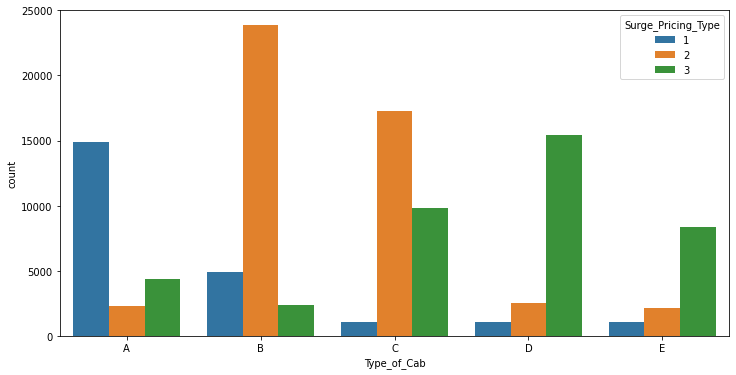

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Type_of_Cab', data = df,order=['A','B','C','D','E'],hue='Surge_Pricing_Type')

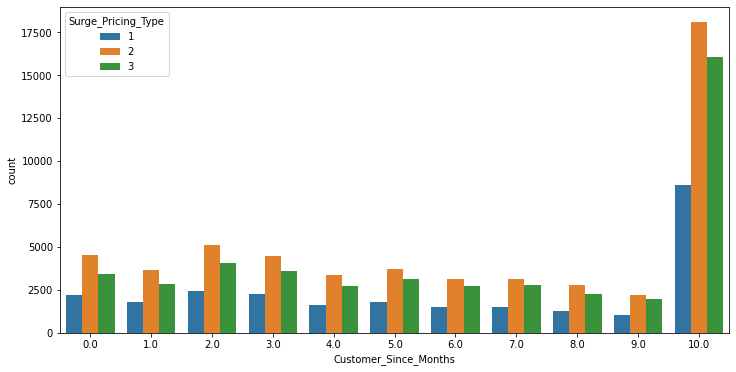

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Customer_Since_Months', data = df,hue='Surge_Pricing_Type')

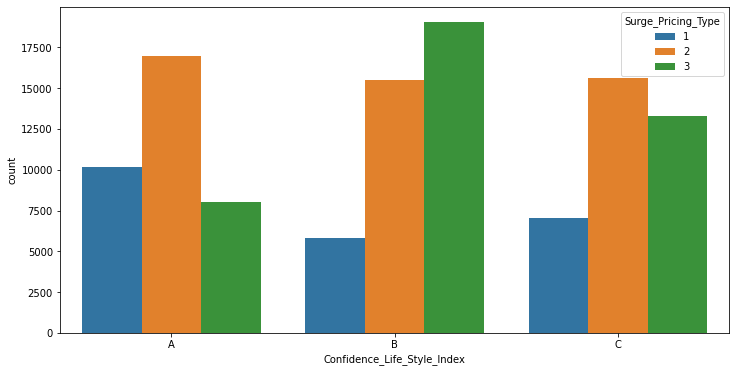

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Confidence_Life_Style_Index', data = df,hue='Surge_Pricing_Type')

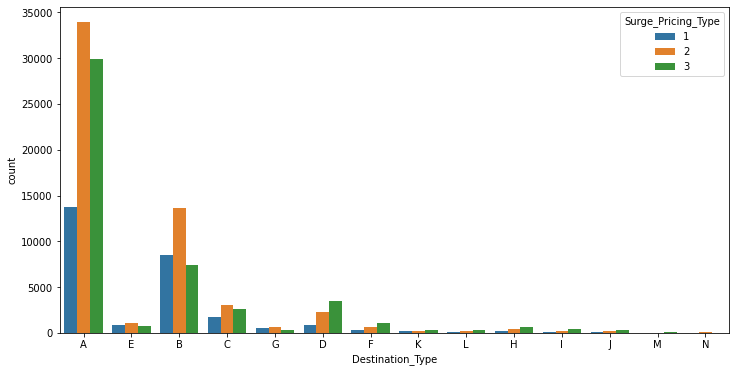

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Destination_Type', data = df,hue='Surge_Pricing_Type')

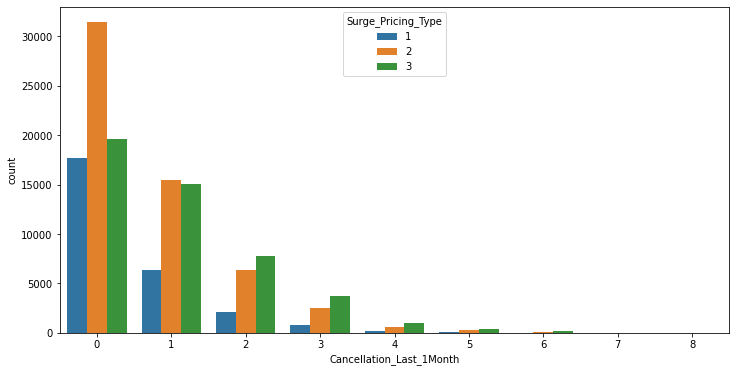

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Cancellation_Last_1Month', data = df,hue='Surge_Pricing_Type')

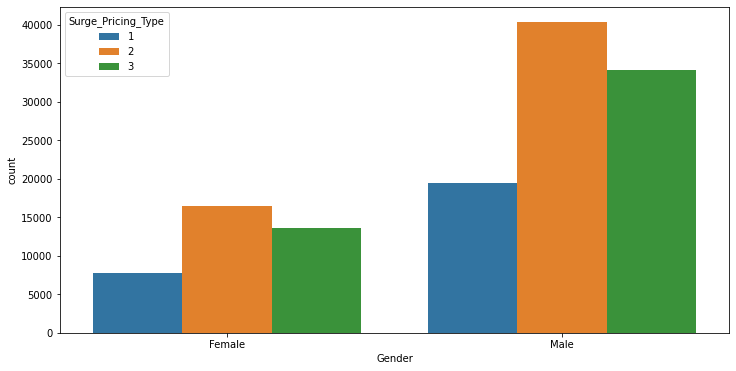

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Gender', data = df,hue='Surge_Pricing_Type')

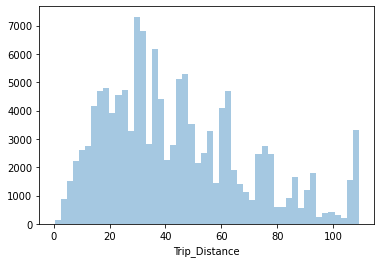

In [ ]:
sns.distplot(df['Trip_Distance'],kde = False,norm_hist=False)

###Trip_ID column seems to be of no use for modelling. So we can simply drop it.

In [ ]:
#dropping Trip_ID column
del df['Trip_ID']

#Cleaning the data
##Handling the null values

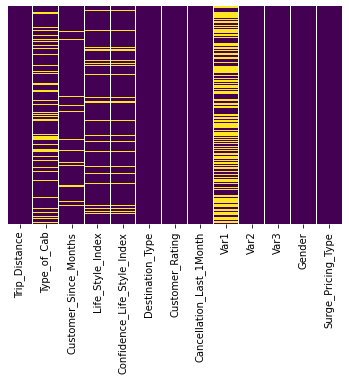

In [ ]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
#Understanding Proportion of Null Values
df.isnull().mean()*100

Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

###Our dataset contains null values in following columns:
* Type_of_Cab                    
* Customer_Since_Months           
* Life_Style_Index               
* Confidence_Life_Style_Index    
* Var1                           

### We have more than 54 % null values in Var1 column.
###Hence, we can simply drop var1 column

In [ ]:
#deleting var1 column
del df['Var1']

###Handling the other 4 columns having null values

In [ ]:
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

* **For now i am dropping all those columns having null values as it will not make much impact as our dataset is too large.**

In [ ]:
#creating a copy of the original df
new_df=df.copy()

In [ ]:
#dropping all those columns having nan values
new_df.dropna(inplace=True)
new_df.shape

(90052, 12)

* **Now, after dropping all those columns we have about 90000 records in the dataset.**

In [ ]:
new_df.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

* **And we have no null values in the new_df**

In [ ]:
new_df['Surge_Pricing_Type'].value_counts()

2    38918
3    32504
1    18630
Name: Surge_Pricing_Type, dtype: int64

In [ ]:
# df['Type_of_Cab']=df['Type_of_Cab'].fillna(df['Type_of_Cab'].mode()[0])
# df['Customer_Since_Months']=df['Customer_Since_Months'].fillna(round(df['Customer_Since_Months'].mean()))
# df['Life_Style_Index']=df['Life_Style_Index'].fillna(df['Life_Style_Index'].mean())
# df['Confidence_Life_Style_Index']=df['Confidence_Life_Style_Index'].fillna(df['Confidence_Life_Style_Index'].mode()[0])

##**Now, let's analyse the numerical features of the dataset.**

In [ ]:
new_df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000
mean,44.570410,6.009872,2.809990,2.856178,0.786257,51.268834,75.197841,2.154067
std,25.550645,3.627505,0.221479,0.973910,1.041551,4.991620,11.594410,0.737629
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000,1.000000
25%,24.880000,3.000000,2.661130,2.166250,0.000000,48.000000,67.000000,2.000000
50%,38.450000,6.000000,2.807160,2.903750,0.000000,50.000000,74.000000,2.000000
75%,60.940000,10.000000,2.951590,3.581250,1.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000,3.000000


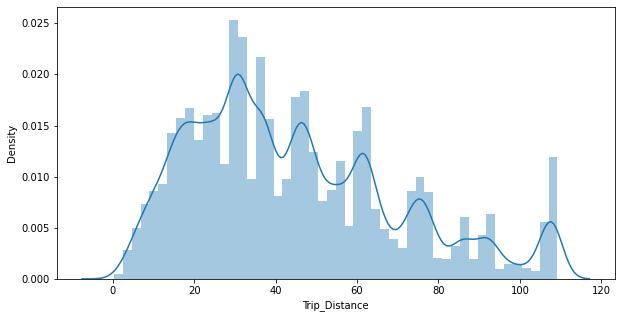

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(new_df['Trip_Distance'])

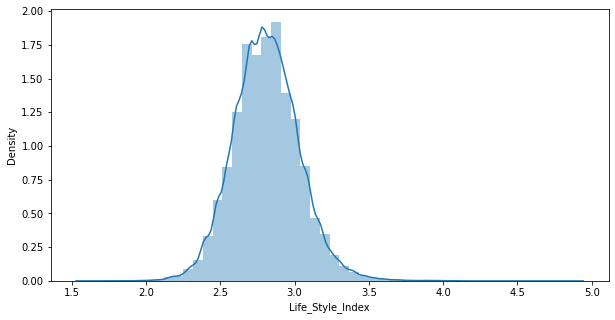

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(new_df['Life_Style_Index'])

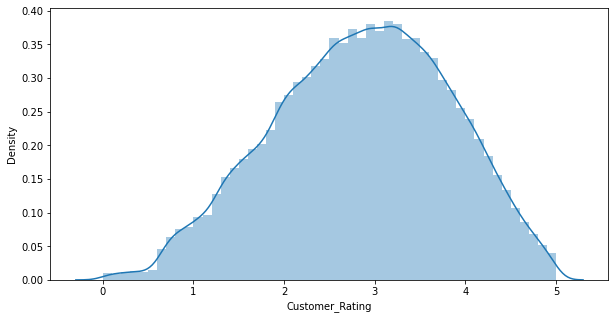

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(new_df['Customer_Rating'])

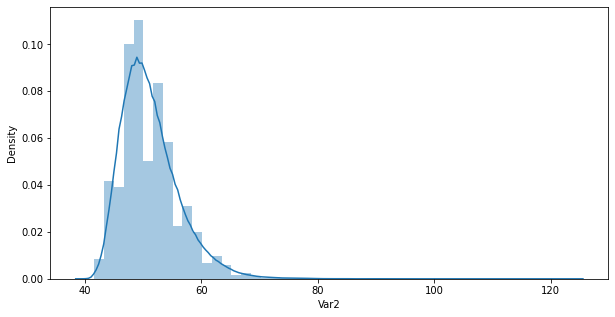

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(new_df['Var2'])

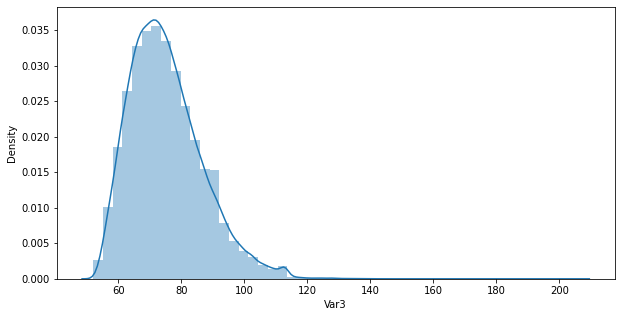

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(new_df['Var3'])

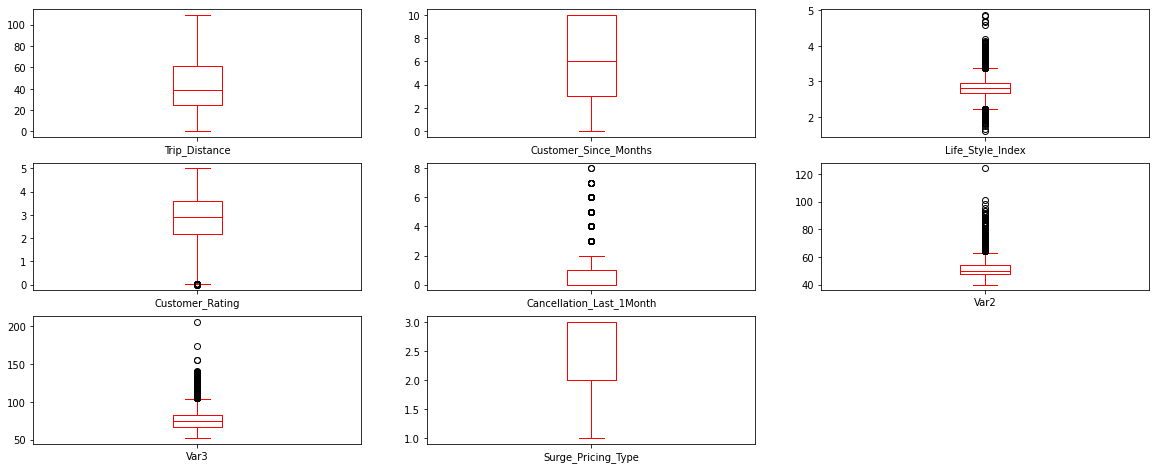

In [ ]:
#Boxplot of numerical columns
new_df.plot(kind='box', layout=(3,3),subplots=True,figsize=(20,8),color='r')
plt.show()

In [ ]:
# num_list=list(df.select_dtypes(exclude='object'))
# for i in num_list:
#     q1=df[i].quantile(0.25)
#     q3=df[i].quantile(0.75)
#     iqr=q3-q1
#     for j in range(0,len(df[i])):
#         if df[i][j]>(q3+(1.5*iqr)) or df[i][j]<(q1-(1.5*iqr)):
#             df[i][j]=df[i].mode()[0]


In [ ]:
# #Boxplot of numerical columns
# df.plot(kind='box', layout=(3,3),subplots=True,figsize=(20,8),color='r')
# plt.show()

In [ ]:
#Converting the type of Customer_Since_Months from float to int
new_df['Customer_Since_Months']=new_df['Customer_Since_Months'].astype(int)

In [143]:
new_df.shape

(90052, 12)

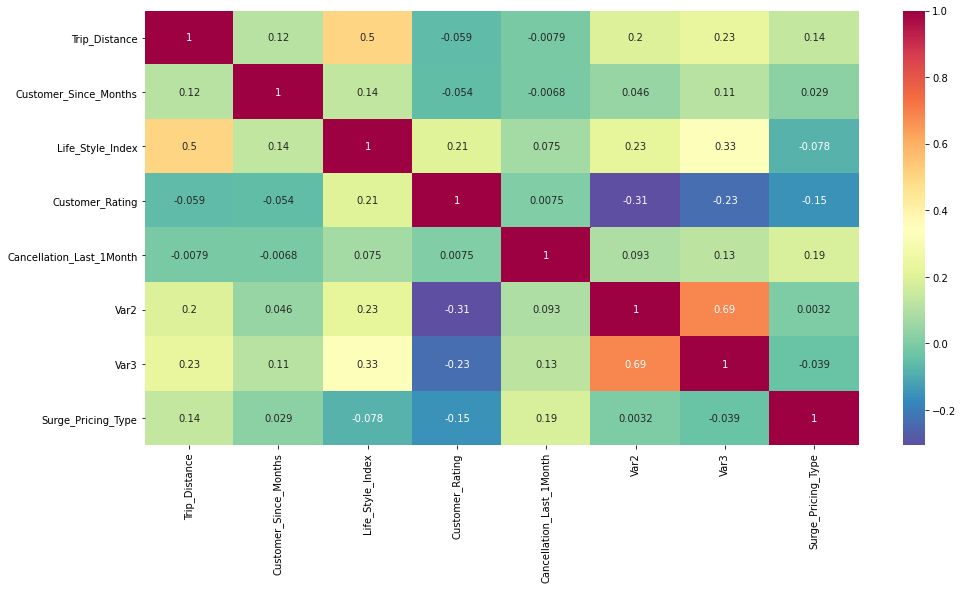

In [159]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(new_df.corr(),annot=True, cmap='Spectral_r')

##**Categorical Columns**
* Type_of_Cab
* Confidence_Life_Style_Index  
* Destination_Type             
* Gender                       

In [ ]:
# categorical = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']

* **Let's do one hot encodiing in Type_of_Cab column**

In [124]:
df1=new_df.copy()

In [125]:
dummies=pd.get_dummies(new_df.Type_of_Cab,prefix='Cab_',)
df1=pd.concat([new_df, dummies], axis=1)
df1.shape

(90052, 17)

In [126]:
df1.drop(columns='Type_of_Cab',axis=1,inplace=True)
df1.head(1)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,Cab__A,Cab__B,Cab__C,Cab__D,Cab__E
0,6.77,1,2.42769,A,A,3.905,0,46,60,Female,2,0,1,0,0,0


* **Let's do label encodiing in Gender Column**

In [127]:
gender_dict={'Male':1,'Female':0}
df1['Gender']=df1['Gender'].map(gender_dict)

* **Let's do label encoding in Confidence_Life_Style_Index column**

In [128]:
conf_dict={'A':0,'B':1,'C':2}
df1['Confidence_Life_Style_Index']=df1['Confidence_Life_Style_Index'].map(conf_dict)

* **Let's do one hot encoding in Destination_Type column**

In [129]:
dummies1=pd.get_dummies(df1.Destination_Type,prefix='Destination_',)
df1=pd.concat([df1, dummies1], axis=1)
df1.shape

(90052, 30)

In [130]:
df1.drop(columns='Destination_Type',axis=1,inplace=True)
df1.shape

(90052, 29)

In [131]:
df1.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,Cab__A,Cab__B,Cab__C,Cab__D,Cab__E,Destination__A,Destination__B,Destination__C,Destination__D,Destination__E,Destination__F,Destination__G,Destination__H,Destination__I,Destination__J,Destination__K,Destination__L,Destination__M,Destination__N
0,6.77,1,2.42769,0,3.9050,0,46,60,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.47,10,2.78245,1,3.4500,0,56,78,1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.95,10,3.03453,1,3.4025,4,49,102,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,29.72,10,2.83958,2,2.9750,1,50,75,1,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,18.44,2,2.81871,1,3.5825,0,46,63,1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
df1.shape

(90052, 29)

* **Now, our dataset have 16 features and we are done with categorical features too**

##**Feature Selection**

* **Let's comppare the features**

In [146]:
X, y = df1.drop('Surge_Pricing_Type',axis=1), df1['Surge_Pricing_Type']

In [157]:
from sklearn.ensemble import ExtraTreesClassifier
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
# Training the model
extra_tree_forest.fit(X, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

print(feature_importance)

ext=pd.DataFrame(extra_tree_forest.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=False)

[0.11143289 0.06295809 0.10593404 0.0364762  0.1080174  0.04814341
 0.08818078 0.09996812 0.01342628 0.10539569 0.05365915 0.02838185
 0.08128328 0.03149697 0.00431498 0.00647047 0.00221071 0.00362751
 0.00146962 0.00124334 0.00116582 0.00113829 0.00107501 0.00049471
 0.00069278 0.00087678 0.00024526 0.00022057]


,extratrees
0,0.111433
4,0.108017
2,0.105934
9,0.105396
7,0.099968
6,0.088181
12,0.081283
1,0.062958
10,0.053659
5,0.048143


* **Now we can apply feature selection here and can drop less important features**

##**Data Preparation**

* **Lets split the data into train and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

* **Scaling the datasett**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Implementation of models on our dataset:**

We can implement
* Logistic Regression
* SVM classifier
* Logistic Regression
* Random Forrest
* XGBoost

##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
lr_model=LR(solver='sag',multi_class='ovr')
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr=lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

Accuracy: 71.65%


#Let's apply SVM Multiclass Classification

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [81]:
svm_model_linear = svm.SVC(kernel = 'linear', C = 1,decision_function_shape='ovo').fit(X_train, y_train)
# rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
# poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [82]:
linear_pred = svm_model_linear.predict(X_test)
# rbf_pred = rbf.predict(X_test)

In [85]:
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (Linear Kernel):  71.40
F1 (Linear Kernel):  70.91


#Random Forest Classifier

In [ ]:
# rf = RandomForestClassifier()

# param_dict_rf = {
#     'max_depth': [4, 6, 8],
#     'min_samples_leaf': [40, 50],
#     'min_samples_split': [50, 100, 150],
#     'n_estimators': [50, 80, 100]
#   }

# rf_grid = GridSearchCV(estimator=rf,
#                        param_grid = param_dict_rf,
#                        cv = 5, verbose=2, scoring='roc_auc')

# rf_grid.fit(X_train,y_train)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [86]:
#accuracy of train data
y_pred_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.9827062882186588

In [87]:
#accuracy of test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7067916315017989

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix


#XGBoost

#LGBM